# Equação da Reta

ret1 = 0.00
ret2 = 1.80
ret3 = -1.80


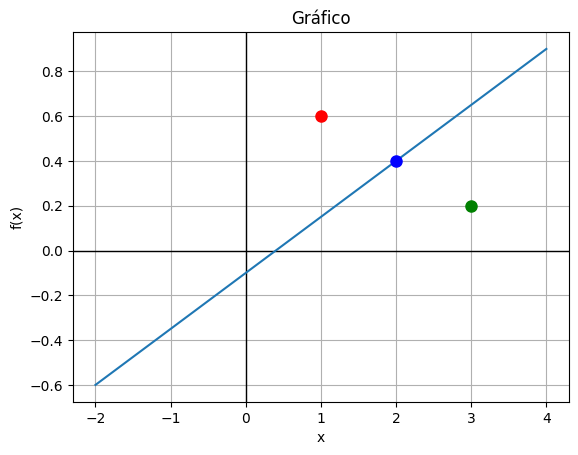

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# parâmetros da reta
a = -1
b = 4
c = 0.4

# função para plotar reta
def plotline(a, b, c):
    # fixando x
    x = np.linspace(-2, 4, 50) # vetor com 50 valores entre -2 e 4

    # eq da reta ax + by + c = 0,  logo: y = (-ax - c) / b
    y = (-a * x - c) / b

    # plotando
    plt.axvline(0, -1, 1, color='k', linewidth=1) # eixo vertical
    plt.axhline(0, -2, 4, color='k', linewidth=1) # eixo horizontal
    plt.plot(x, y)
    plt.grid(True)

    plt.title("Gráfico")
    plt.xlabel("x")
    plt.ylabel("f(x)")

# plotar a reta
plotline(a, b, c)

# ponto 1 (sobre a reta)
p1 = (2, 0.4)
ret1 = a * p1[0] + b * p1[1] + c # é zero para qualquer ponto sobre a reta
plt.plot(p1[0], p1[1], color='b', marker='o', markersize=8)
print("ret1 = %.2f" % ret1)

# ponto 2 (ponto acima da reta)
p2 = (1, 0.6)
ret2 = a * p2[0] + b * p2[1] + c # é positivo, pois ponto está acima da reta
plt.plot(p2[0], p2[1], color='r', marker='o', markersize=8)
print("ret2 = %.2f" % ret2)

# ponto 3 (ponto abaixo da reta)
p3 = (3, 0.2)
ret3 = a * p3[0] + b * p3[1] + c # é negativo, pois ponto está abaixo da reta
plt.plot(p3[0], p3[1], color='g', marker='o', markersize=8)
print("ret3 = %.2f" % ret3)

# Exemplo classificação linear

No exemplo vamos obter os 100 pontos aleatórios de maneira automática e vamos manualmente atribuir valores para os parâmetros para w1, w2 e b para tentar para tentar classificar a distribuição gerada.
Fonte: https://github.com/alura-cursos/pln-deep-learning/blob/aula-03/Classifica%C3%A7%C3%A3o-Linear.ipynb

0


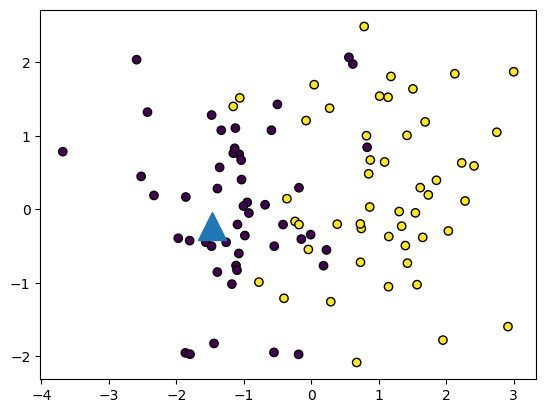

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

np.random.seed(46) # mudar o valor troca a distribuição

# X: dados, Y: labels
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, # c=Y == cor é igual ao array de labels Y (que possui 0s ou 1s, logo são 2 cores!)
           edgecolor='k')

p = X[10]
print(Y[10])
plt.plot(p[0], p[1], marker='^', markersize=20)

-4.4


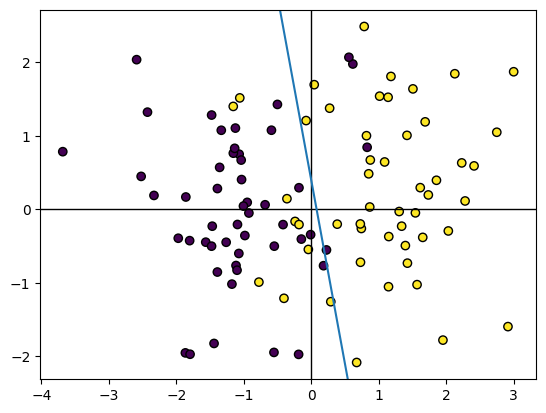

In [ ]:
def plotmodel(w1, w2, b):

  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')

  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()

  x = np.linspace(-2, 4, 50)
  y = (-w1*x -b)/w2

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y, label='_nolegend_')

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

w1 = 5 #a
w2 = 1  #b
b  = -0.4  #c
plotmodel(w1, w2, b)

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)

1 yellow


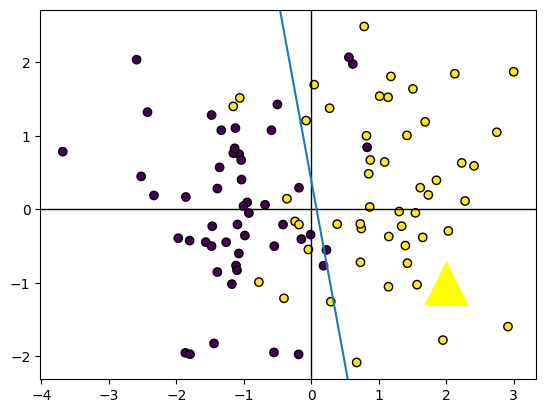

In [ ]:
def classify(ponto, w1, w2, b):
  ret = w1 * ponto[0] + w2 * ponto[1] + b

  if ret >= 0:
    return 1, 'yellow'
  else:
    return 0, 'blue'

p = (2, -1)
classe, cor = classify(p, w1, w2, b)
print(classe, cor)

plotmodel(w1,w2, b)
plt.plot(p[0], p[1], marker='^', color=cor, markersize=30)

In [ ]:
acertos = 0
for k in range(len(X)):
  categ, _ = classify(X[k], w1, w2, b)
  if categ == Y[k]:
    acertos += 1


print("Acurácia: {0}".format(100*acertos/len(X)))

Acurácia: 87.0


# Criar um Perceptron no PyTorch

- Usa o módulo nn (neural networks)
- Usaremos a camada linear (perceptron clássico)
    - parâmetros:
        - in_features: dimensionalidade da entrada (=3, pois teremos 3 entradas)
        - out_features: dimensionalidade da saída (=1, pois é um número)
- No exemplo teremos 3 features de entrada e 1 feature de saída     
- Fonte: https://github.com/alura-cursos/pln-deep-learning/blob/aula-03/Camada-Linear.ipynb  

In [ ]:
import torch
from torch import nn # modulo de neural networks

In [ ]:
torch.manual_seed(42)

perceptron = nn.Linear(in_features=3, out_features=1, bias=True)
print(perceptron)

Linear(in_features=3, out_features=1, bias=True)


In [ ]:
for nome, tensor in perceptron.named_parameters():
    print(nome, tensor.data)

print('')
print(perceptron.weight.data)
print(perceptron.bias.data)

weight tensor([[ 0.4414,  0.4792, -0.1353]])
bias tensor([0.5304])

tensor([[ 0.4414,  0.4792, -0.1353]])
tensor([0.5304])


In [ ]:
w1, w2, w3 = perceptron.weight.data.numpy()[0]
b = perceptron.bias.data.numpy()

# w1 * x1 + w2 * x2 + w3 * x3 + b = 0

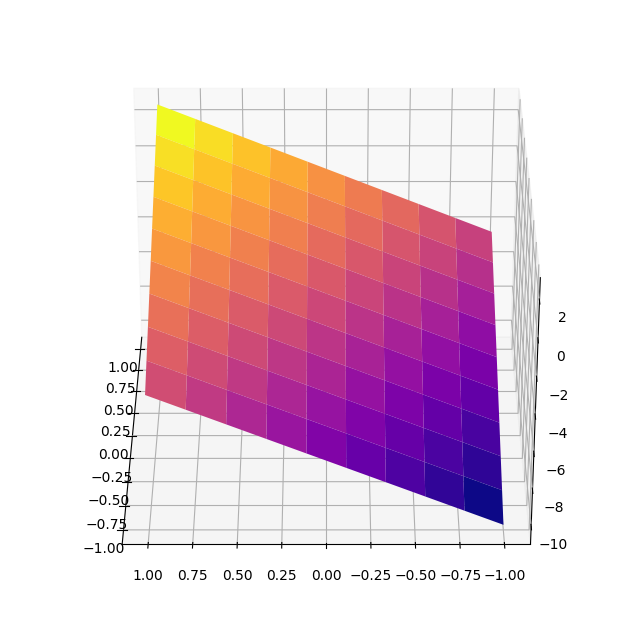

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(perceptron):

    w1, w2, w3 = perceptron.weight.data.numpy()[0]
    b = perceptron.bias.data.numpy()

    X1 = np.linspace(-1,1,10)
    X2 = np.linspace(-1,1,10)

    X1, X2 = np.meshgrid(X1,X2)

    X3 = (b - w1*X1 - w2*X2) / w3

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(projection='3d')
    ax.view_init(azim=180)

    ax.plot_surface(X1, X2, X3, cmap='plasma')

plot3d(perceptron)

tensor([0.7391], grad_fn=<AddBackward0>)


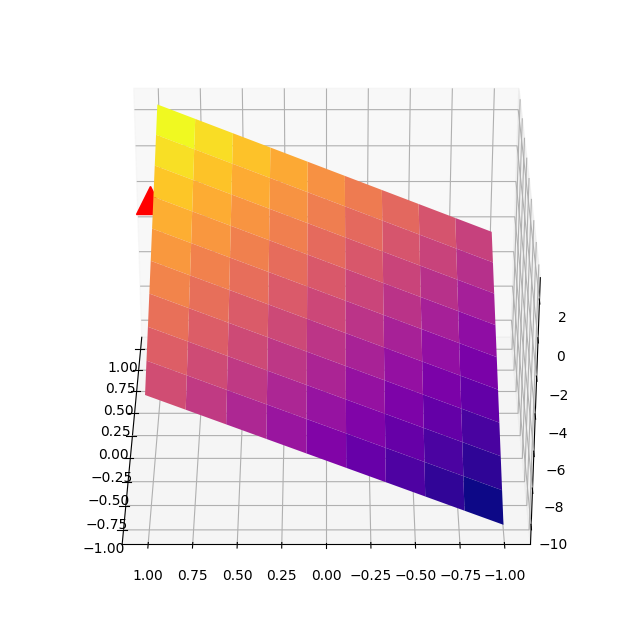

In [ ]:
X = torch.Tensor([0, 1, 2])
y = perceptron(X)

print(y)

plot3d(perceptron)
plt.plot([X[0]], [X[1]], [X[2]], color='r', marker='^', markersize=20)

# Funções de Ativação no PyTorch

- Fonte: https://github.com/alura-cursos/pln-deep-learning/blob/aula-04/Ativa%C3%A7%C3%B5es.ipynb

In [ ]:
import torch
from torch import nn

-2.8


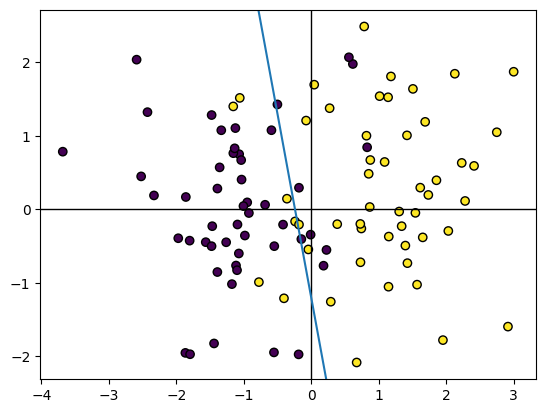

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(46)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

def plotmodel(w1, w2, b):

  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')

  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()

  x = np.linspace(-2, 4, 50)
  y = (-w1*x -b)/w2

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y, label='_nolegend_')

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

w1 = 5 #a
w2 = 1  #b
b  = 1.2  #c
plotmodel(w1, w2, b)

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)

In [ ]:
perceptron = nn.Linear(2, 1) # dimensionalidade 2 na entrada e 1 na saída
activation = nn.Sigmoid() # função de ativação sigmoide

print(perceptron.weight.data) # pesos
print(perceptron.bias.data) # bias

perceptron.weight = nn.Parameter(torch.Tensor([[w1, w2]]))
perceptron.bias   = nn.Parameter(torch.Tensor([b]))

print(perceptron.weight.data)
print(perceptron.bias.data)

tensor([[-0.1549,  0.1427]])
tensor([-0.3443])
tensor([[5., 1.]])
tensor([1.2000])


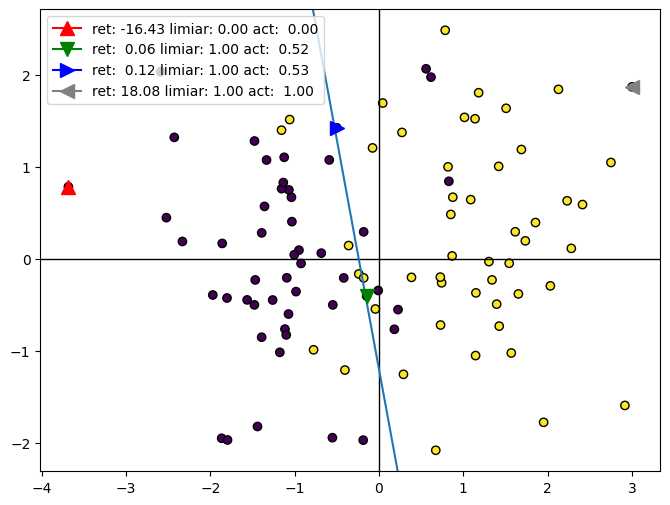

In [ ]:
markers = ['^', 'v', '>', '<']
colors = ['r', 'g', 'b', 'gray']

plt.figure(figsize=(8, 6))
plotmodel(w1, w2, b)
for k, idx in enumerate([17, 21, 43, 66]):
  x = torch.Tensor(X[idx])

  ret = perceptron(x)
  act = activation(ret)

  act_limiar = 0 if ret.data < 0 else 1

  label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + ' limiar: {:4.2f}'.format(act_limiar) + ' act: {:5.2f}'.format(act.data.numpy()[0])
  plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=10, label=label)

plt.legend()
plt.show()

In [ ]:
# Descomente uma das linhas abaixo e rode novamente a célula anterior

activation = nn.ReLU()
# activation = nn.Tanh()

# Definindo uma Arquitetura no PyTorch

- fontte: https://github.com/alura-cursos/pln-deep-learning/blob/aula-05/Arquitetura.ipynb

## Utilizando a função de ativação softmax

In [ ]:
import torch
from torch import nn

softmax = nn.Softmax()

output = torch.Tensor([2, -1, 0.5]) # supondo uma saída com 3 neurônios
output_ativado = softmax(output) # distribuição de probabilidades
print(output_ativado)

print(output_ativado.sum()) # a soma da distrib de prob é 1

tensor([0.7856, 0.0391, 0.1753])
tensor(1.)


<ipython-input-18-47fda5e6d2e6>:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output_ativado = softmax(output) # distribuição de probabilidades


## Gerando distribuições não linearmente separáveis com o Scikit-Learn

- Nessas distribuições é necessário utilizar funções não lineares para efetuarmos a separação dos dados

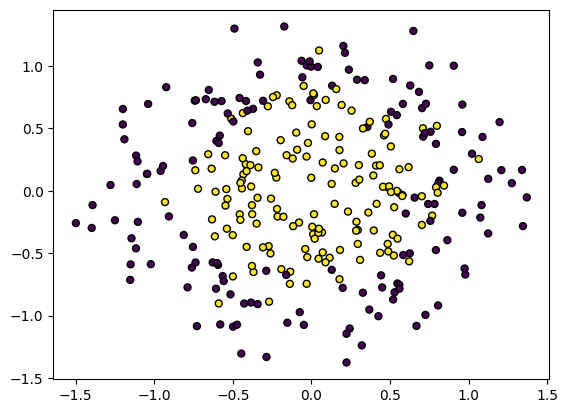

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X1, Y1 = make_circles(n_samples=300, noise=0.2,
                      factor=0.5, random_state=1) # chama a criação do dataset

plt.scatter(X1[:, 0], X1[:, 1], marker='o',
            c=Y1, s=25, edgecolor='k')

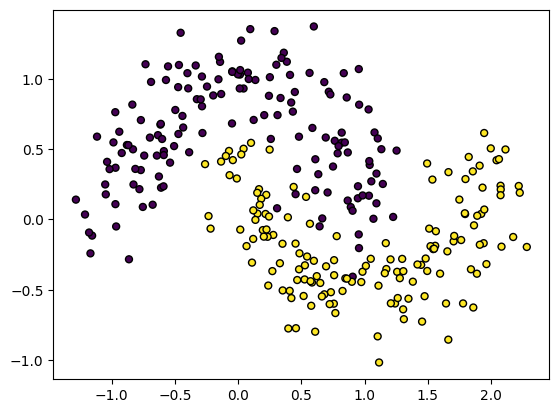

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X1, Y1 = make_moons(n_samples=300, noise=0.2)

plt.scatter(X1[:, 0], X1[:, 1], marker='o',
            c=Y1, s=25, edgecolor='k')

## Criando uma rede MLP

### Utilizando a GPU

- Vá em Editar -> Configurações de Notebook -> Acelerador de Hardware: GPU

In [ ]:
import torch.cuda
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

cuda


### Distribuição de dados

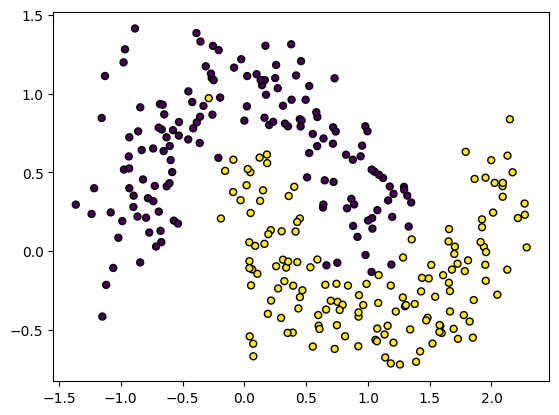

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X1, Y1 = make_moons(n_samples=300, noise=0.2) # cria uma distribuição de dados não linearmente separável

plt.scatter(X1[:, 0], X1[:, 1], marker='o',
            c=Y1, s=25, edgecolor='k')

### Com o nn.Sequential

- nn.Sequential é um container onde se pode colocar múltiplos módulos.
- Ao realizar um forward em um objeto Sequential ele aplicará sequencialmente os módulos nele contidos para gerar uma saída, passando por todas as camadas.
- O out_features da camada hidden é um hiperparâmetro. O programador irá decidir seu valor dependendo da complexidade do problema.

In [ ]:
import torch
from torch import nn # neural networks

input_size = 2 # entrada da primeira camada possui 2 dimensões
hidden_size = 8 # tamanho da camada escondida
output_size = 1 # saída da última camada

net = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size),    # camada escondida (hidden)
                    nn.ReLU(),      # ativação não linear
                    nn.Linear(in_features=hidden_size, out_features=output_size) )   # camada de saída (output)

net.to(device) # para usar a gpu ou a cpu

print(net)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


- De acordo com o summary, com 8 neurônios na camada hidden teremos 24 parâmetros
- Na camada de saída temos 9 parâmetros

In [ ]:
from torchsummary import summary

summary(net, input_size =(1, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


- Foward: primeiro se deve transformar o dado de entrada em um tensor
- Na predição basta passar o tensor de entrada para a rede

In [ ]:
print(X1.dtype)
print(X1.shape) # temos 300 amostras com 2 dimensões

tensor = torch.from_numpy(X1).float()
print(tensor.dtype)

tensor = tensor.to(device)
pred = net(tensor) # predição - será a predição das 300 amostras com um único perceptron na camada de saída
print(pred.size())

float64
(300, 2)
torch.float32
torch.Size([300, 1])


### Com o nn.Module


- É a forma mais organizada de fazer.
- A classe que criaremos será uma subclasse da classe nn.Module (o que é indicado por meio dos parênteses ao lado do nome da classe que criamos)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class MinhaRede(nn.Module): # a classe minha rede é uma subclasse da classe nn.Module

    def __init__(self, input_size, hidden_size, output_size): # self indica que o método é pertencente à classe
        super(MinhaRede, self).__init__() # inicializa a classe superior

        # define a arquitetura da rede
            # usamos o self para indicar que são atributos acessíveis de qualquer lugar da classe
        self.hidden = nn.Linear(in_features=input_size, out_features=hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(in_features=hidden_size, out_features=output_size)

    def forward(self, X): # X é o parâmetro de entrada

        # gerar uma saída a partir do X
        hidden = self.relu(self.hidden(X)) # hidden é uma variavel que recebe a ativação da saída do atributo self.hidden
        output = self.output(hidden)

        return output

In [ ]:
input_size = 2 # entrada da primeira camada possui 2 dimensões
hidden_size = 8 # tamanho da camada escondida
output_size = 1 # saída da última camada - é um hiperparâmetro

net = MinhaRede(input_size, hidden_size, output_size) # instancia a classe (chama implicitamente o método __init__())

net = net.to(device) # colocar a rede na gpu ou na cpu

print(net)

MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


- Foward
    - É idêntico tanto para para o nn.Sequential quanto par ao nn.Module

In [ ]:
print(X1.shape) # para 300 amostras com 2 dimensões
tensor = torch.from_numpy(X1).float()
tensor = tensor.to(device) # colocar a rede na gpu ou na cpu

pred = net(tensor) # fizemos 300 predições com 1 dimensão
print(pred.size())

(300, 2)
torch.Size([300, 1])
